In [14]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import linregress
from scipy.stats import linregress

# citipy module to determine city based on latitude and longitude.
from citipy import citipy

#import API key
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
#**original value is 1500, but 50 was used for testing purposes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
coordinates = zip(lats, lngs)
coordinates

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | danilov
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | bilma
Processing Record 8 of Set 1 | bonthe
Processing Record 9 of Set 1 | victoria
Processing Record 10 of Set 1 | berlevag
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | fallon
Processing Record 13 of Set 1 | nivala
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | olafsvik
Processing Record 16 of Set 1 | port hardy
Processing Record 17 of Set 1 | bengkulu
Processing Record 18 of Set 1 | arcachon
Processing Record 19 of Set 1 | beira
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | yellowknife
Processing Record 

Processing Record 37 of Set 4 | amderma
City not found. Skipping...
Processing Record 38 of Set 4 | new norfolk
Processing Record 39 of Set 4 | rawson
Processing Record 40 of Set 4 | pemex
Processing Record 41 of Set 4 | san juan
Processing Record 42 of Set 4 | airai
Processing Record 43 of Set 4 | chokurdakh
Processing Record 44 of Set 4 | bajil
Processing Record 45 of Set 4 | takoradi
Processing Record 46 of Set 4 | castro
Processing Record 47 of Set 4 | isiro
Processing Record 48 of Set 4 | te anau
Processing Record 49 of Set 4 | padang
Processing Record 50 of Set 4 | saldanha
Processing Record 1 of Set 5 | saurimo
Processing Record 2 of Set 5 | homer
Processing Record 3 of Set 5 | samusu
City not found. Skipping...
Processing Record 4 of Set 5 | manjacaze
Processing Record 5 of Set 5 | isangel
Processing Record 6 of Set 5 | zhangjiakou
Processing Record 7 of Set 5 | opuwo
Processing Record 8 of Set 5 | teguise
Processing Record 9 of Set 5 | severobaykalsk
Processing Record 10 of Se

Processing Record 26 of Set 8 | takhtamygda
Processing Record 27 of Set 8 | guarapari
Processing Record 28 of Set 8 | puerto del rosario
Processing Record 29 of Set 8 | maniitsoq
Processing Record 30 of Set 8 | biak
Processing Record 31 of Set 8 | lata
Processing Record 32 of Set 8 | bajo baudo
City not found. Skipping...
Processing Record 33 of Set 8 | iguape
Processing Record 34 of Set 8 | flinders
Processing Record 35 of Set 8 | saskylakh
Processing Record 36 of Set 8 | lasa
Processing Record 37 of Set 8 | bridlington
Processing Record 38 of Set 8 | grand gaube
Processing Record 39 of Set 8 | kuressaare
Processing Record 40 of Set 8 | redlands
Processing Record 41 of Set 8 | ambulu
Processing Record 42 of Set 8 | russell
Processing Record 43 of Set 8 | namioka
Processing Record 44 of Set 8 | halalo
City not found. Skipping...
Processing Record 45 of Set 8 | mujiayingzi
Processing Record 46 of Set 8 | lagoa
Processing Record 47 of Set 8 | ustka
Processing Record 48 of Set 8 | oktyabr

Processing Record 12 of Set 12 | valdivia
Processing Record 13 of Set 12 | songea
Processing Record 14 of Set 12 | tudela
Processing Record 15 of Set 12 | adrar
Processing Record 16 of Set 12 | osterburg
Processing Record 17 of Set 12 | kota kinabalu
Processing Record 18 of Set 12 | quatre cocos
Processing Record 19 of Set 12 | chase
Processing Record 20 of Set 12 | mehtar lam
Processing Record 21 of Set 12 | lenine
Processing Record 22 of Set 12 | pemangkat
Processing Record 23 of Set 12 | guilin
Processing Record 24 of Set 12 | griffith
Processing Record 25 of Set 12 | korla
Processing Record 26 of Set 12 | frontera
Processing Record 27 of Set 12 | kaeo
Processing Record 28 of Set 12 | san jose
Processing Record 29 of Set 12 | mugur-aksy
Processing Record 30 of Set 12 | strezhevoy
Processing Record 31 of Set 12 | nahrin
Processing Record 32 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 33 of Set 12 | tambacounda
Processing Record 34 of Set 12 | coolum beach


In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.7900,-152.4072,42.31,100,100,16.11,US,2022-11-17 02:35:47
1,Hermanus,-34.4187,19.2345,50.81,72,99,4.59,ZA,2022-11-17 02:28:20
2,Ushuaia,-54.8000,-68.3000,51.46,50,40,8.05,AR,2022-11-17 02:28:16
3,Danilov,58.1908,40.1717,25.95,95,100,2.10,RU,2022-11-17 02:35:47
4,Cape Town,-33.9258,18.4232,61.21,72,0,16.11,ZA,2022-11-17 02:35:47
5,Bilma,18.6853,12.9164,64.78,26,4,6.67,NE,2022-11-17 02:35:48
6,Bonthe,7.5264,-12.5050,75.78,85,52,3.69,SL,2022-11-17 02:35:48
7,Victoria,22.2855,114.1577,79.97,80,64,11.01,HK,2022-11-17 02:34:38
8,Berlevag,70.8578,29.0864,41.00,60,12,16.37,NO,2022-11-17 02:35:48
9,Carnarvon,-24.8667,113.6333,68.40,51,91,15.50,AU,2022-11-17 02:28:18


In [7]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2022-11-17 02:35:47,57.7900,-152.4072,42.31,100,100,16.11
1,Hermanus,ZA,2022-11-17 02:28:20,-34.4187,19.2345,50.81,72,99,4.59
2,Ushuaia,AR,2022-11-17 02:28:16,-54.8000,-68.3000,51.46,50,40,8.05
3,Danilov,RU,2022-11-17 02:35:47,58.1908,40.1717,25.95,95,100,2.10
4,Cape Town,ZA,2022-11-17 02:35:47,-33.9258,18.4232,61.21,72,0,16.11


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

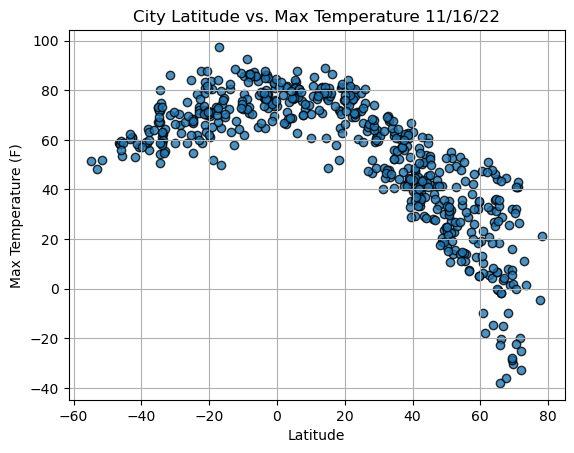

In [10]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

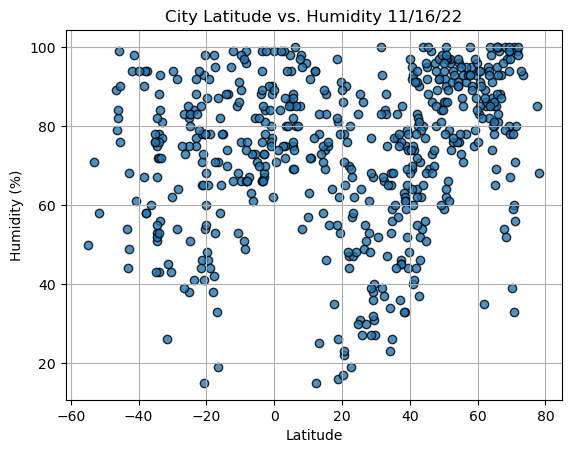

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

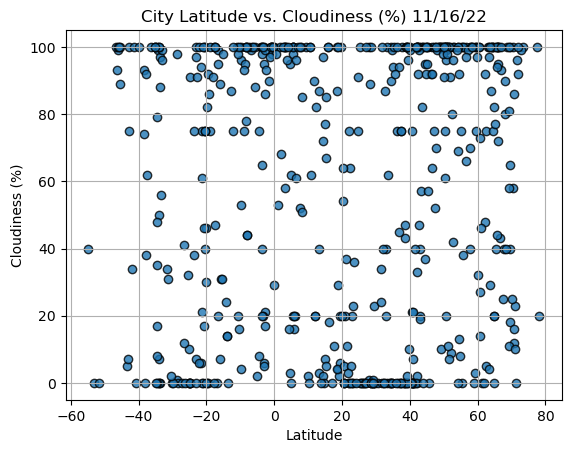

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

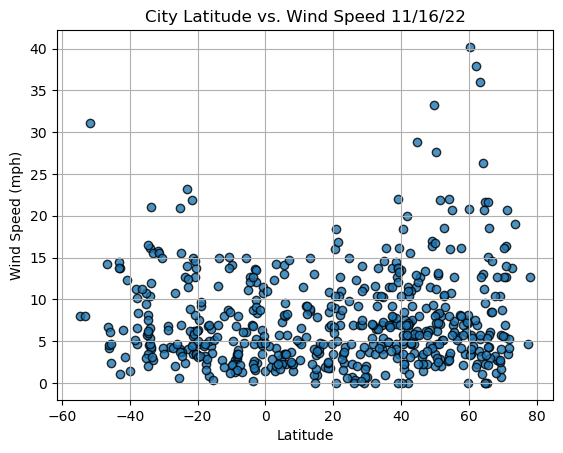

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2022-11-17 02:35:47,57.7900,-152.4072,42.31,100,100,16.11
3,Danilov,RU,2022-11-17 02:35:47,58.1908,40.1717,25.95,95,100,2.10
5,Bilma,NE,2022-11-17 02:35:48,18.6853,12.9164,64.78,26,4,6.67
6,Bonthe,SL,2022-11-17 02:35:48,7.5264,-12.5050,75.78,85,52,3.69
7,Victoria,HK,2022-11-17 02:34:38,22.2855,114.1577,79.97,80,64,11.01


In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

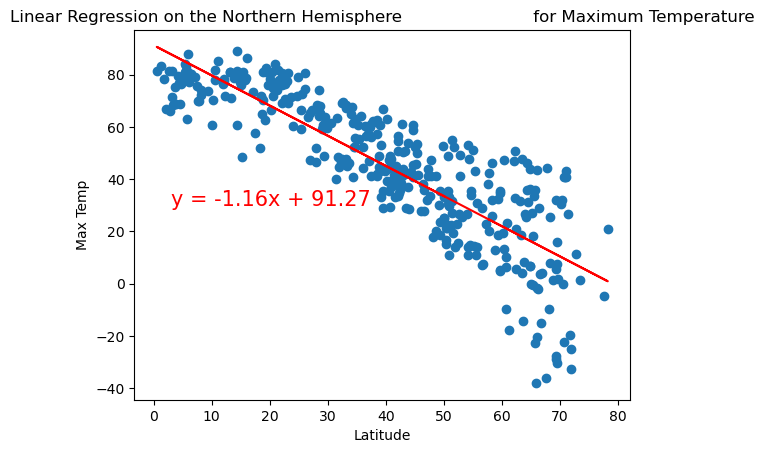

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(3,30))

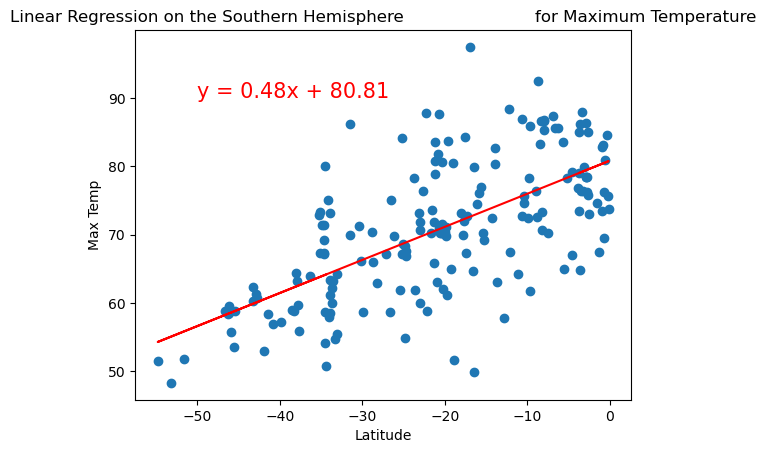

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

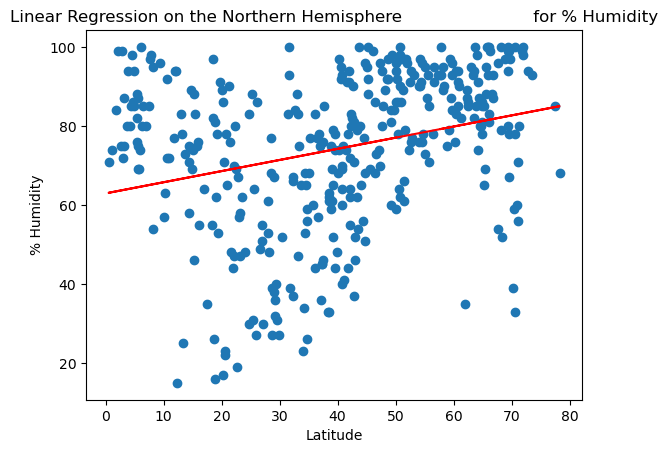

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

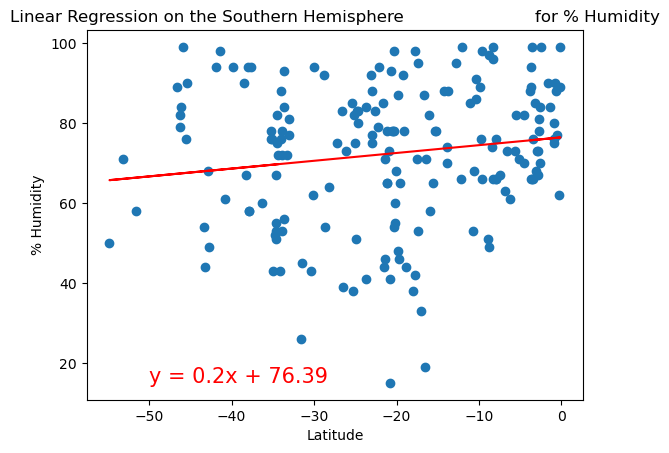

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

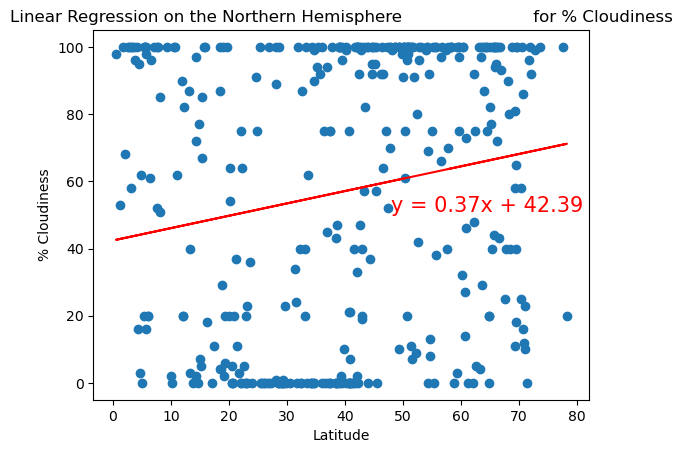

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(48,51))

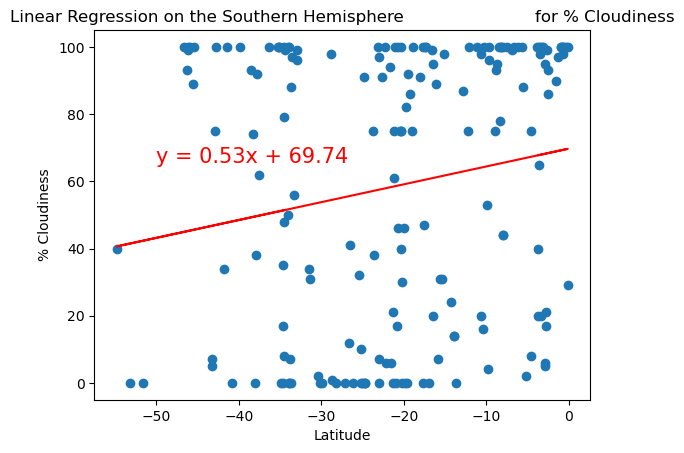

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,65.5))

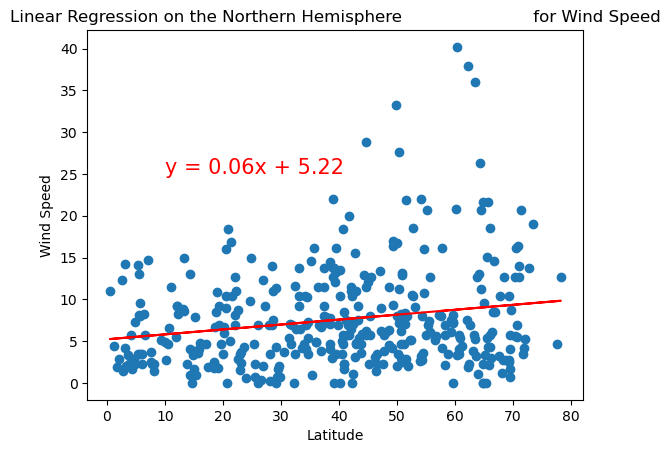

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,25))

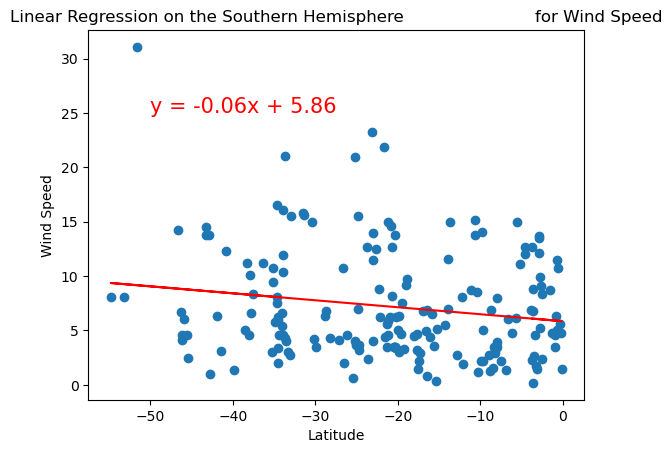

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))